# Database Wine

Questo dataset è stato originariamente introdotto da Forina et al. nel 1988 e comprende le misurazioni chimiche di vini ottenuti da tre diverse coltivazioni in Italia:  il Barolo, il Grignolino e il Barbera.
I dettagli del dataset del vino:

Caratteristiche:
Le caratteristiche misurate sono le seguenti 13:
Alcohol (Alcool), Malic acid (Acido malico), Ash (Cenere), Alcalinity of ash (Alcalinità della cenere), Magnesium (Magnesio), Total phenols (Fenoli totali). Flavanoids (Flavonoidi), Nonflavanoid phenols (Fenoli non flavonoidi), Proanthocyanins (Proantocianidine), Color intensity (Intensità del colore), Hue (Tonalità), OD280/OD315 of diluted wines (OD280/OD315 dei vini diluiti), Proline (Prolina)

Etichette di classe:
Il dataset include le etichette di classe che identificano la cultivar di ogni vino.
Ci sono tre classi di vino nel dataset: classe 0 (Barolo), classe 1 (Grignolino) e classe 2 (Barbera).

Dimensione del dataset:
Il dataset del vino contiene un totale di **178 istanze** (campioni di vino).
Ciascuna istanza è descritta da **13 caratteristiche chimiche**.




In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Carica il dataset Wine
wine_data = load_wine()

# Creiamo un DataFrame pandas per visualizzare i dati
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target 
# Visualizziamo le prime 5 righe del DataFrame
print(df.head())




   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

**Conteggio delle istanze**

In [4]:
# Caratteristiche (X)
X = wine_data.data

# Etichette (y)
y = wine_data.target

# Conta il numero di istanze per ciascuna classe
counts_per_class = df['target'].value_counts()

# Stampa il conteggio delle istanze per ciascuna classe
print("--------------------\n")
print("Conteggio delle istanze per ciascuna classe:")
print(counts_per_class)
print("\n--------------------\n")



--------------------

Conteggio delle istanze per ciascuna classe:
target
1    71
0    59
2    48
Name: count, dtype: int64

--------------------



**PCA e plot 3d**

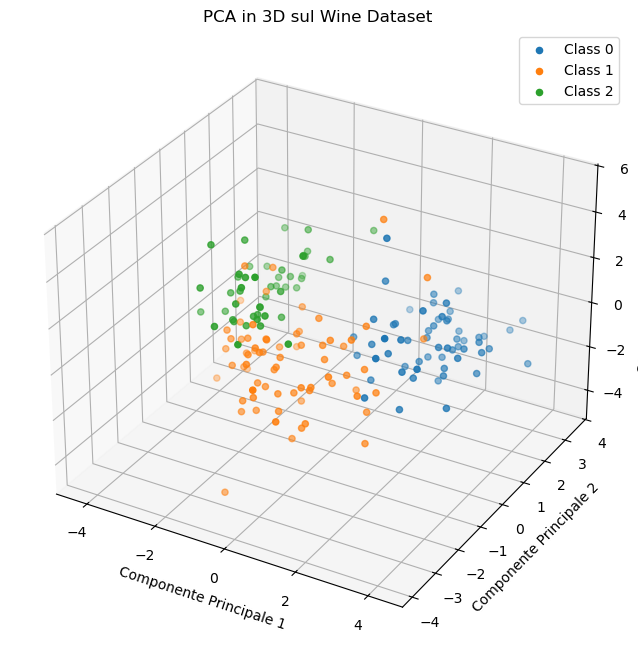

In [6]:
# Standardizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applicazione della PCA con tre componenti principali
#è stato comunque fatto per verificare quantitativamente la bontà del metodo 

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

#Se volessi provare la LDA
# lda = LDA(n_components=2)
#X_lda = lda.fit_transform(X_scaled, y)

# Creazione di DataFrame per i dati originali e dopo la PCA
original_df = pd.DataFrame(X, columns=wine_data.feature_names)
pca_df = pd.DataFrame(X_pca, columns=['Componente Principale 1', 'Componente Principale 2', 'Componente Principale 3'])

# Aggiungi la colonna delle etichette
original_df['Classe'] = y
pca_df['Classe'] = y


# Visualizzazione dei risultati in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(wine_data.target):
    ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], label=f'Class {label}')
ax.set_xlabel('Componente Principale 1')
ax.set_ylabel('Componente Principale 2')
ax.set_zlabel('Componente Principale 3')
ax.set_title('PCA in 3D sul Wine Dataset')
ax.legend()
plt.show()


**Plot 2D per coppie di componenti**

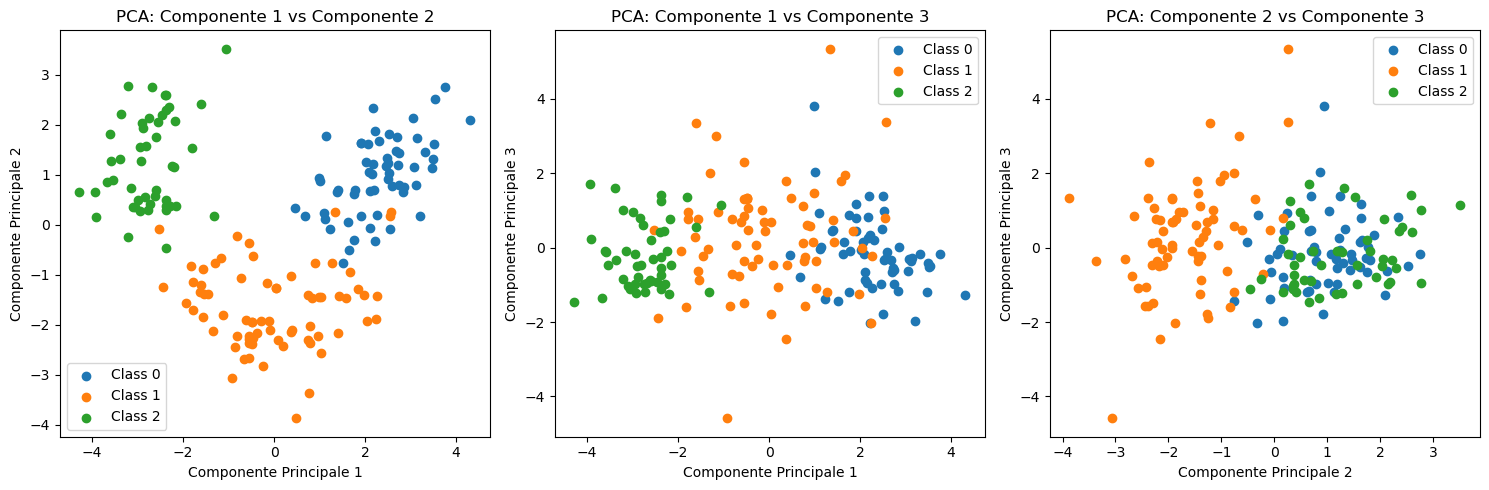


Dati Finali dopo PCA:
   Componente Principale 1  Componente Principale 2  Componente Principale 3  \
0                 3.316751                 1.443463                -0.165739   
1                 2.209465                -0.333393                -2.026457   
2                 2.516740                 1.031151                 0.982819   
3                 3.757066                 2.756372                -0.176192   
4                 1.008908                 0.869831                 2.026688   

   Classe  
0       0  
1       0  
2       0  
3       0  
4       0  


In [8]:

# Plot 2D
fig = plt.figure(figsize=(15, 5))

# Plot 2D: Componente 1 vs Componente 2
ax1 = fig.add_subplot(131)
for label in np.unique(wine_data.target):
    ax1.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}')
ax1.set_xlabel('Componente Principale 1')
ax1.set_ylabel('Componente Principale 2')
ax1.set_title('PCA: Componente 1 vs Componente 2')
ax1.legend()

# Plot 2D: Componente 1 vs Componente 3
ax2 = fig.add_subplot(132)
for label in np.unique(wine_data.target):
    ax2.scatter(X_pca[y == label, 0], X_pca[y == label, 2], label=f'Class {label}')
ax2.set_xlabel('Componente Principale 1')
ax2.set_ylabel('Componente Principale 3')
ax2.set_title('PCA: Componente 1 vs Componente 3')
ax2.legend()

# Plot 2D: Componente 2 vs Componente 3
ax3 = fig.add_subplot(133)
for label in np.unique(wine_data.target):
    ax3.scatter(X_pca[y == label, 1], X_pca[y == label, 2], label=f'Class {label}')
ax3.set_xlabel('Componente Principale 2')
ax3.set_ylabel('Componente Principale 3')
ax3.set_title('PCA: Componente 2 vs Componente 3')
ax3.legend()

plt.tight_layout()
plt.show()

print("\nDati Finali dopo PCA:")
print(pca_df.head())


**Splitting degli esempi**

Prima di toccare con mano il modello di machine learning vero e proprio, è importante suddividere il set di esempi in un set di training e uno di set, al fine di avere una valutazione delle performance non affetta da bias.

In [10]:
from sklearn.model_selection import train_test_split

# Suddivisione dei dati in set di addestramento e test
x_train, x_test, y_train, y_test = train_test_split(pca_df,y, test_size=0.2, random_state=42)# se non impostiamo random_state sarà diverso ad ogni lancio

# Calcola il numero di esempi per classe nei set di dati di addestramento e test
train_counts_per_class = np.bincount(y_train)
test_counts_per_class = np.bincount(y_test)

# Stampa il numero di esempi per classe nei set di dati di addestramento e test
print("Numero di esempi per classe nel set di addestramento:")
for class_label, count in enumerate(train_counts_per_class):
    print(f"Classe {class_label}: {count} esempi")

print("\nNumero di esempi per classe nel set di test:")
for class_label, count in enumerate(test_counts_per_class):
    print(f"Classe {class_label}: {count} esempi")

Numero di esempi per classe nel set di addestramento:
Classe 0: 45 esempi
Classe 1: 57 esempi
Classe 2: 40 esempi

Numero di esempi per classe nel set di test:
Classe 0: 14 esempi
Classe 1: 14 esempi
Classe 2: 8 esempi


**Implementiamo un modello di classificatore di tipo K-NN**


Il KNN è un tipo di algoritmo di apprendimento automatico che può essere utilizzato per classificare o prevedere il valore di una variabile target in base alla sua somiglianza con altri esempi in un set di addestramento. Per fare ciò, esamina i K esempi (o vicini) più vicini nel set di addestramento al nuovo esempio e assegna la stessa classe o valore della maggior parte di quei K vicini.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Creazione del modello KNN con n_neighbors=5 e metrica euclidea
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Addestramento del modello
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

**Valutazione delle performance**

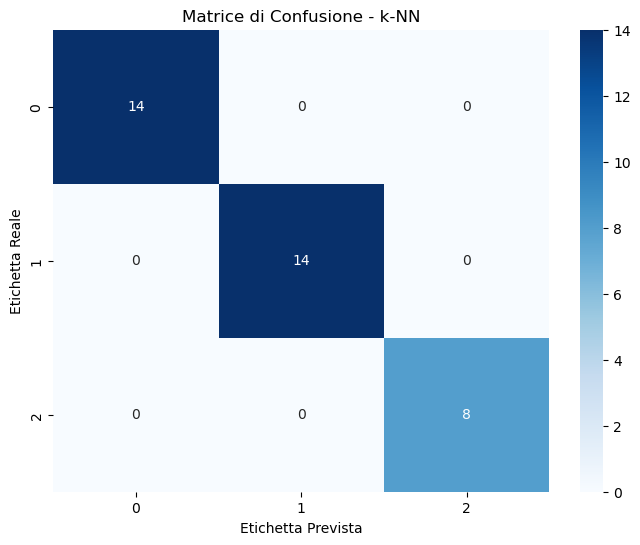

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione - k-NN')
plt.xlabel('Etichetta Prevista')
plt.ylabel('Etichetta Reale')
plt.show()

In [15]:
# Calcola la percentuale di varianza spiegata da ciascuna componente principale
explained_variance_ratio = pca.explained_variance_ratio_

# Calcola la percentuale di varianza conservata considerando le prime n componenti principali
num_components = 3  # Supponiamo di aver scelto di mantenere tre componenti principali
variance_preserved = sum(explained_variance_ratio[:num_components])

print("Percentuale di varianza conservata:", variance_preserved * 100, "%")

Percentuale di varianza conservata: 66.52996889318526 %


In [28]:
# Stampa la varianza spiegata da ciascuna componente
print("Varianza spiegata per ciascuna componente:", pca.explained_variance_ratio_)

Varianza spiegata per ciascuna componente: [0.36198848 0.1920749  0.11123631]
